# Bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Charger les données

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Train_Data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Valeurs manquantes 

### Commençons par la Colonne `Age`

In [4]:
display(HTML(train_data['Age'].to_frame().to_html()))

,Age
0,22.00
1,38.00
2,26.00
3,35.00
4,35.00
5,NaN
6,54.00
7,2.00
8,27.00
9,14.00


##### Il y a effectivement des valeurs manquantes dans la colonnes 'Age'. Même si nous n'en doutions pas, quelle est la stratégie a adopté pour remplacer ces valeurs manquantes par des valeurs plus pertinentes ? Essayons d'analyser les autres valeurs associées à ces valeurs manquantes. 

In [5]:
display(HTML(train_data[['Age', 'Name']].to_html()))

,Age,Name
0,22.00,"Braund, Mr. Owen Harris"
1,38.00,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
2,26.00,"Heikkinen, Miss. Laina"
3,35.00,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.00,"Allen, Mr. William Henry"
5,NaN,"Moran, Mr. James"
6,54.00,"McCarthy, Mr. Timothy J"
7,2.00,"Palsson, Master. Gosta Leonard"
8,27.00,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,14.00,"Nasser, Mrs. Nicholas (Adele Achem)"


En mettant en perspective la colonne `Name` avec la colonne `Age` on remarque qu'il y a des 'Titres' tels quel 'Mr', 'Mrs', 'Dr', 'Master', 'Miss', etc.. qui nous donne quelques indications sur l'âge que pourrait avoir nos personnes n'ayant pas leurs âges renseignés. Nous allons récupérer uniquement les lignes ayant des valeurs manquantes das la colonnes 'Age' et voir comment remplacer de façon pertinente ces valeurs.

In [6]:
# Filter rows where 'Age' is NaN
nan_age_rows = train_data[train_data['Age'].isna()]

display(HTML(nan_age_rows[['Age', 'Name']].to_html()))

,Age,Name
5,NaN,"Moran, Mr. James"
17,NaN,"Williams, Mr. Charles Eugene"
19,NaN,"Masselmani, Mrs. Fatima"
26,NaN,"Emir, Mr. Farred Chehab"
28,NaN,"O'Dwyer, Miss. Ellen ""Nellie"""
29,NaN,"Todoroff, Mr. Lalio"
31,NaN,"Spencer, Mrs. William Augustus (Marie Eugenie)"
32,NaN,"Glynn, Miss. Mary Agatha"
36,NaN,"Mamee, Mr. Hanna"
42,NaN,"Kraeff, Mr. Theodor"


In [7]:
display(HTML(train_data.to_html()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


Après reflexion, l'idée serait de créer une feature supplémentaire 'Title' venant extraire de la colonne `Name` uniquement le titre.

In [8]:
# Define a function to extract titles
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

# Apply the function to create a 'Title' column
train_data['Title'] = train_data['Name'].apply(extract_title)

display(HTML(train_data['Title'].to_frame().to_html()))

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [9]:
# Count occurrences of each title within the train dataset
title_counts = train_data['Title'].value_counts()

print(title_counts)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


De cette nouvelle colonne `Titre` nous allons pouvoir déterminer la valeur median des âges sur otre datasets. Nous ferons ensuite correspondre cette valeur médiane par Titre à chaque personne du même titre n'ayant pas encore d'âge renseigné. 

In [10]:
selected_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']
filtered_df = train_data[train_data['Title'].isin(selected_titles)]

# Calculate median age for each title
median_ages = filtered_df.groupby('Title')['Age'].median()

median_ages

Title
Dr        46.5
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

In [11]:
# Filter rows where 'Age' is NaN
nan_age_rows = train_data[train_data['Age'].isna()]
display(HTML(nan_age_rows[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
5,NaN,"Moran, Mr. James",Mr
17,NaN,"Williams, Mr. Charles Eugene",Mr
19,NaN,"Masselmani, Mrs. Fatima",Mrs
26,NaN,"Emir, Mr. Farred Chehab",Mr
28,NaN,"O'Dwyer, Miss. Ellen ""Nellie""",Miss
29,NaN,"Todoroff, Mr. Lalio",Mr
31,NaN,"Spencer, Mrs. William Augustus (Marie Eugenie)",Mrs
32,NaN,"Glynn, Miss. Mary Agatha",Miss
36,NaN,"Mamee, Mr. Hanna",Mr
42,NaN,"Kraeff, Mr. Theodor",Mr


In [12]:
# Count occurrences of each title
title_counts_nan_age_rows = nan_age_rows['Title'].value_counts()

print(title_counts_nan_age_rows)

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64


In [13]:
train_data['Age'].isnull().sum()

177

Il y a 177 Valeurs manquantes avant imputation

In [14]:
# Replace NaN values in nan_age_rows['Age'] with median values based on Title
for index, row in nan_age_rows.iterrows():
    title = row['Title']
    median_age = median_ages[title]
    nan_age_rows.loc[index, 'Age'] = median_age
    train_data.loc[index, 'Age'] = median_age

Assurons nous que les modifications on été réalisé conformément à nos attentes.

In [15]:
display(HTML(nan_age_rows[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
5,30.0,"Moran, Mr. James",Mr
17,30.0,"Williams, Mr. Charles Eugene",Mr
19,35.0,"Masselmani, Mrs. Fatima",Mrs
26,30.0,"Emir, Mr. Farred Chehab",Mr
28,21.0,"O'Dwyer, Miss. Ellen ""Nellie""",Miss
29,30.0,"Todoroff, Mr. Lalio",Mr
31,35.0,"Spencer, Mrs. William Augustus (Marie Eugenie)",Mrs
32,21.0,"Glynn, Miss. Mary Agatha",Miss
36,30.0,"Mamee, Mr. Hanna",Mr
42,30.0,"Kraeff, Mr. Theodor",Mr


In [16]:
train_data['Age'].isnull().sum()

0

Il n'y a plus de valeurs manquantes dans notre colonne 'Age'.  

In [17]:
display(HTML(train_data[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
0,22.00,"Braund, Mr. Owen Harris",Mr
1,38.00,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",Mrs
2,26.00,"Heikkinen, Miss. Laina",Miss
3,35.00,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,35.00,"Allen, Mr. William Henry",Mr
5,30.00,"Moran, Mr. James",Mr
6,54.00,"McCarthy, Mr. Timothy J",Mr
7,2.00,"Palsson, Master. Gosta Leonard",Master
8,27.00,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,14.00,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


### Poursuivons par la Colonne `Embarked`

In [18]:
train_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [19]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

La majorité des personnes ont embarqués à S (Southampton). Nous choisissons de remplacer les valeurs manquantes par la valeur S.

In [20]:
# Filter rows where 'Embarked' is NaN
nan_embarked_rows = train_data[train_data['Embarked'].isna()]
nan_embarked_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [21]:
# Replace NaN values in 'Embarked' with 'S'
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [22]:
train_data['Embarked'].iloc[69]

'S'

In [23]:
train_data['Embarked'].iloc[829]

'S'

In [24]:
train_data['Embarked'].isnull().sum()

0

### Finissons par la colonne `Cabin`

In [25]:
display(HTML(train_data['Cabin'].to_frame().to_html()))

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
5,NaN
6,E46
7,NaN
8,NaN
9,NaN


In [26]:
len(train_data['Cabin'])

891

Il y a 891 lignes.

In [27]:
train_data['Cabin'].isnull().sum()

687

Dont 687 sans valeurs.

In [28]:
train_data['Cabin'].value_counts().sum()

204

Seulement 204 ont des valeurs liées aux cabines.

In [29]:
train_data['Cabin'].isnull().sum()/len(train_data['Cabin'])

0.7710437710437711

Ce qui correspond à 77% environ de valeurs manquantes dans cette colonnes. Analysons de plus prêt ces lignes.

In [30]:
nan_cabin_rows = train_data[train_data['Cabin'].isna()]


In [31]:
display(HTML(nan_cabin_rows.to_html()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,30.00,0,0,330877,8.4583,NaN,Q,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,Mrs
12,13,0,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.0500,NaN,S,Mr
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S,Mr
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,Miss


In [32]:
display(HTML(nan_cabin_rows[['Pclass', 'Cabin']].to_html()))

,Pclass,Cabin
0,3,NaN
2,3,NaN
4,3,NaN
5,3,NaN
7,3,NaN
8,3,NaN
9,2,NaN
12,3,NaN
13,3,NaN
14,3,NaN


In [33]:
nan_cabin_rows['Pclass'].value_counts()

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

In [34]:
train_data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [35]:
# Filter rows where 'Pclass' is equal to 3
pclass_3_rows = train_data[train_data['Pclass'] == 3]
#pclass_3_rows

# Further filter to include only rows where 'Cabin' is not NaN
pclass_3_rows_with_cabin = pclass_3_rows[pclass_3_rows['Cabin'].notna()]
pclass_3_rows_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
128,129,1,3,"Peter, Miss. Anna",female,21.0,1,1,2668,22.3583,F E69,C,Miss
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,Miss
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Mrs
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Mrs
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,Mr
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,Mr
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,Mr
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,Master


In [36]:
# Filter rows where 'Pclass' is equal to 2
pclass_2_rows = train_data[train_data['Pclass'] == 2]
#pclass_2_rows

# Further filter to include only rows where 'Cabin' is not NaN
pclass_2_rows_with_cabin = pclass_2_rows[pclass_2_rows['Cabin'].notna()]
pclass_2_rows_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,Mrs
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S,Miss
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,Mr
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,Master
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,Master
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C,Mr
303,304,1,2,"Keane, Miss. Nora A",female,21.0,0,0,226593,12.3500,E101,Q,Miss
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,Mrs
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S,Master


In [37]:
# Filter rows where 'Pclass' is equal to 1
pclass_1_rows = train_data[train_data['Pclass'] == 1]
#pclass_1_rows

# Further filter to include only rows where 'Cabin' is not NaN
pclass_1_rows_with_cabin = pclass_1_rows[pclass_1_rows['Cabin'].notna()]
pclass_1_rows_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss


In [38]:
# Create a new column 'Pont_de_Cabin' with the first letter of each 'Cabin' value
train_data['Pont_de_Cabin'] = train_data['Cabin'].str[0]

In [39]:
# Display the filtered data with the selected columns
result = pclass_3_rows_with_cabin[['Cabin', 'Pclass']]

result.value_counts()
#display(HTML(result.to_html()))

Cabin  Pclass
G6     3         4
E121   3         2
F G73  3         2
E10    3         1
F E69  3         1
F G63  3         1
F38    3         1
Name: count, dtype: int64

En cherchant un plan du bateau du titanic on s'aperçoit que le paquebot était constitué notamment de 7 ponts, allant du pont supérieure A au pont inférieur G. En regardant le plan et en comparant les résulats obtenus plus haut on s'aperçoit que la première lettre des cabines semblent correspondre avec les différents ponts présent sur le bateau.

Selon des informations récupérer sur la page wikipédia les [Passagers du Titanic](https://fr.wikipedia.org/wiki/Passagers_du_Titanic) "la troisième classe est destinée aux nombreux immigrants désireux de s'installer définitivement aux États-Unis.". Cet article nous informe également que "Le traitement de ces passagers varie selon la classe. Ainsi, les passagers de troisième classe sont soumis à de stricts contrôles sanitaires lors de l'embarquement, et sont totalement isolés des autres passagers, afin de faciliter les procédures d'arrivée à Ellis Island." 

**Par conséquent on peut imaginer que les ponts E, F et G sont ceux destinées aux personnes de la troisième classe**

Possibilité d'accéder au [plan global du Titanic](https://www.encyclopedia-titanica.org/titanic-deckplans/g-deck.html)

In [40]:
# Function to determine the side based on the cabin number
def determine_side(cabin):
    if pd.isna(cabin):
        return np.nan
    else:
        # Extract the numerical part of the cabin
        num_part = ''.join(filter(str.isdigit, cabin))
        if num_part:  # Check if there is a numerical part
            num = int(num_part)
            if num % 2 == 0:
                return 'Babord'
            else:
                return 'Tribord'
        else:
            return np.nan

In [41]:
# Apply the function to create the 'Side' column
train_data['Side'] = train_data['Cabin'].apply(determine_side)

display(HTML(train_data['Side'].to_frame().to_html()))

,Side
0,NaN
1,Tribord
2,NaN
3,Tribord
4,NaN
5,NaN
6,Babord
7,NaN
8,NaN
9,NaN


In [42]:
pclass_3_rows_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
128,129,1,3,"Peter, Miss. Anna",female,21.0,1,1,2668,22.3583,F E69,C,Miss
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,Miss
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Mrs
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Mrs
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,Mr
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,Mr
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,Mr
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,Master


### Valeurs manquantes Pont_de_Cabin selon la classe

In [43]:
# Generate random choices for 'E', 'F', or 'G'
random_choices_class_3 = np.random.choice(['E', 'F', 'G'], size=len(pclass_3_rows))

In [44]:
# Assign these random choices to 'Pont_de_Cabin' for Pclass 3
train_data.loc[train_data['Pclass'] == 3, 'Pont_de_Cabin'] = random_choices_class_3

In [45]:
display(HTML(train_data['Pont_de_Cabin'].to_frame().to_html()))

,Pont_de_Cabin
0,E
1,C
2,G
3,C
4,G
5,E
6,E
7,E
8,G
9,NaN


In [46]:
train_data['Pont_de_Cabin'].isnull().sum()

208

In [47]:
train_data.iloc[0]

PassengerId                            1
Survived                               0
Pclass                                 3
Name             Braund, Mr. Owen Harris
Sex                                 male
Age                                 22.0
SibSp                                  1
Parch                                  0
Ticket                         A/5 21171
Fare                                7.25
Cabin                                NaN
Embarked                               S
Title                                 Mr
Pont_de_Cabin                          E
Side                                 NaN
Name: 0, dtype: object

In [48]:
# Generate random choices for 'D', 'E', or 'F'
random_choices_class_2 = np.random.choice(['D', 'E', 'F'], size=len(pclass_2_rows))

In [49]:
# Assign these random choices to 'Pont_de_Cabin' for Pclass 2
train_data.loc[train_data['Pclass'] == 2, 'Pont_de_Cabin'] = random_choices_class_2

In [50]:
train_data['Pont_de_Cabin'].isnull().sum()

40

In [51]:
train_data.iloc[33]

PassengerId                         34
Survived                             0
Pclass                               2
Name             Wheadon, Mr. Edward H
Sex                               male
Age                               66.0
SibSp                                0
Parch                                0
Ticket                      C.A. 24579
Fare                              10.5
Cabin                              NaN
Embarked                             S
Title                               Mr
Pont_de_Cabin                        E
Side                               NaN
Name: 33, dtype: object

In [52]:
# Generate random choices for 'A', 'B', 'C' or 'D'
random_choices_class_1 = np.random.choice(['A', 'B', 'C', 'D'], size=len(pclass_1_rows))

In [53]:
# Assign these random choices to 'Pont_de_Cabin' for Pclass 2
train_data.loc[train_data['Pclass'] == 1, 'Pont_de_Cabin'] = random_choices_class_1

In [54]:
train_data['Pont_de_Cabin'].isnull().sum()

0

In [55]:
train_data.iloc[34]

PassengerId                           35
Survived                               0
Pclass                                 1
Name             Meyer, Mr. Edgar Joseph
Sex                                 male
Age                                 28.0
SibSp                                  1
Parch                                  0
Ticket                          PC 17604
Fare                             82.1708
Cabin                                NaN
Embarked                               C
Title                                 Mr
Pont_de_Cabin                          C
Side                                 NaN
Name: 34, dtype: object

### Valeurs manquantes `Side`
À Creuser

### Valeurs manquantes `Cabin`
À déterminer une fois le problème des valeurs manquantes de la colonnes `Side`résolu

## Encodage de la colonne Sex

In [56]:
# Encode 'Sex' column
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [57]:
display(HTML(train_data['Sex'].to_frame().to_html()))

,Sex
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## Encodage de la colonne Title

In [58]:
codes, uniques = pd.factorize(train_data['Title'])

train_data['Title_dummies'] = codes

train_data[['Title', 'Title_dummies']]

,Title,Title_dummies
0,Mr,0
1,Mrs,1
2,Miss,2
3,Mrs,1
4,Mr,0
...,...,...
886,Rev,5
887,Miss,2
888,Miss,2
889,Mr,0


## Encodage de la colonne Embarked

In [59]:
codes, uniques = pd.factorize(train_data['Embarked'])
train_data['Embarked_dummies'] = codes
train_data[['Embarked', 'Embarked_dummies']]

,Embarked,Embarked_dummies
0,S,0
1,C,1
2,S,0
3,S,0
4,S,0
...,...,...
886,S,0
887,S,0
888,S,0
889,C,1


## Encodage de la colonne Pont_de_Cabin

In [60]:
codes, uniques = pd.factorize(train_data['Pont_de_Cabin'])
train_data['Pont_de_Cabin_dummies'] = codes
train_data[['Pont_de_Cabin', 'Pont_de_Cabin_dummies']]

,Pont_de_Cabin,Pont_de_Cabin_dummies
0,E,0
1,A,1
2,G,2
3,B,3
4,G,2
...,...,...
886,E,0
887,B,3
888,E,0
889,D,5


## Encodage de la colonne Side

In [61]:
codes, uniques = pd.factorize(train_data['Side'])
train_data['Side_dummies'] = codes
train_data[['Side', 'Side_dummies']]

,Side,Side_dummies
0,NaN,-1
1,Tribord,0
2,NaN,-1
3,Tribord,0
4,NaN,-1
...,...,...
886,NaN,-1
887,Babord,1
888,NaN,-1
889,Babord,1


# Matrice de correlation 

In [62]:
# Compute the covariance matrix
covMatrix = np.cov(train_data[['Embarked_dummies', 'Title_dummies', 'Pclass', 'Pont_de_Cabin_dummies']].T, bias=False)

# Create a DataFrame for the covariance matrix to add labels
cov_df = pd.DataFrame(covMatrix, index=['Embarked_dummies', 'Title_dummies', 'Pclass', 'Pont_de_Cabin_dummies'], columns=['Embarked_dummies', 'Title_dummies', 'Pclass', 'Pont_de_Cabin_dummies'])

In [63]:
print(covMatrix)

[[ 0.40408076  0.09617902  0.02428908 -0.11973543]
 [ 0.09617902  2.97680173 -0.27573866  0.01353611]
 [ 0.02428908 -0.27573866  0.69901512 -0.33356915]
 [-0.11973543  0.01353611 -0.33356915  5.65938284]]


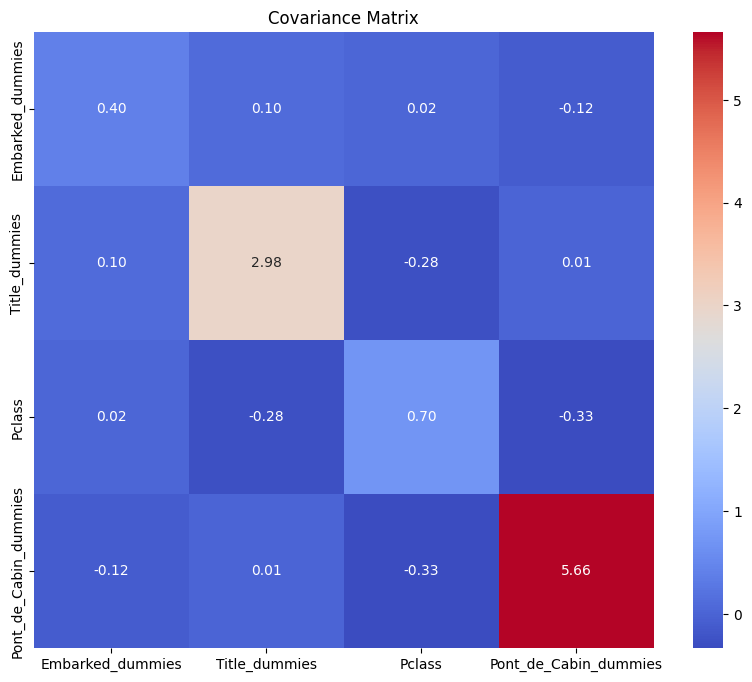

In [64]:
# Plot the covariance matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()

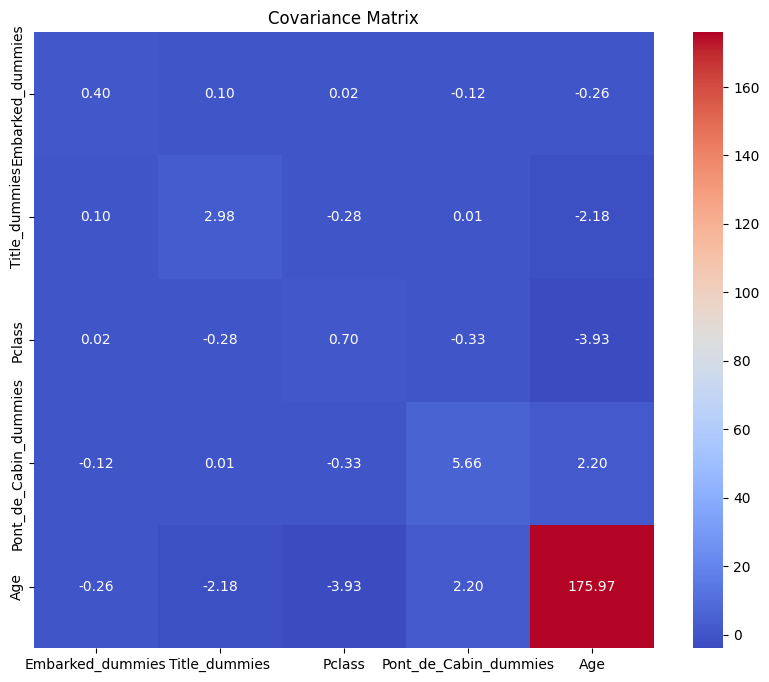

In [65]:
# Compute the covariance matrix
covMatrix = np.cov(train_data[['Embarked_dummies', 'Title_dummies', 'Pclass', 'Pont_de_Cabin_dummies', 'Age']].T, bias=False)

# Create a DataFrame for the covariance matrix to add labels
cov_df = pd.DataFrame(covMatrix, index=['Embarked_dummies', 'Title_dummies', 'Pclass', 'Pont_de_Cabin_dummies', 'Age'], columns=['Embarked_dummies', 'Title_dummies', 'Pclass', 'Pont_de_Cabin_dummies', 'Age'])

# Plot the covariance matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()

In [66]:
# Convert non-numeric columns to numeric if possible
train_data_numeric = train_data.apply(pd.to_numeric, errors='coerce')

# Drop columns that couldn't be converted to numeric
train_data_numeric = train_data_numeric.dropna(axis=1)

# Compute the covariance matrix for all numeric columns in the DataFrame
covMatrix = np.cov(train_data_numeric.T, bias=False)

# Create a DataFrame for the covariance matrix to add labels
cov_df = pd.DataFrame(covMatrix, index=train_data_numeric.columns, columns=train_data_numeric.columns)

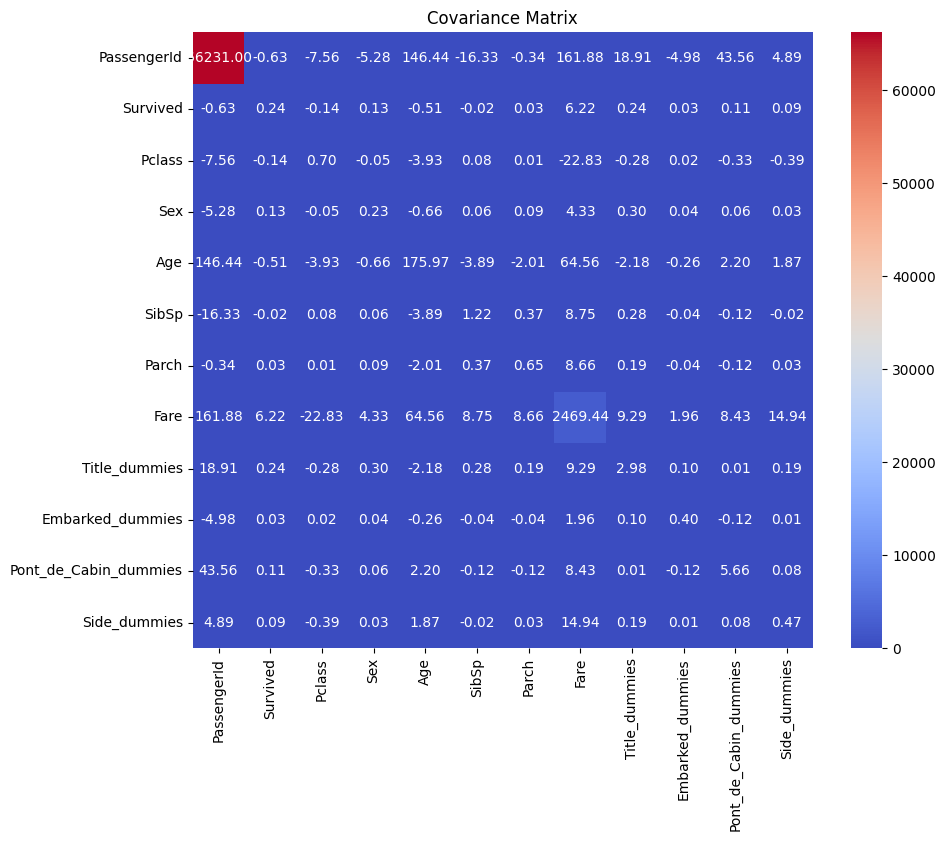

In [67]:
# Plot the covariance matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Name                   891 non-null    object 
 4   Sex                    891 non-null    int64  
 5   Age                    891 non-null    float64
 6   SibSp                  891 non-null    int64  
 7   Parch                  891 non-null    int64  
 8   Ticket                 891 non-null    object 
 9   Fare                   891 non-null    float64
 10  Cabin                  204 non-null    object 
 11  Embarked               891 non-null    object 
 12  Title                  891 non-null    object 
 13  Pont_de_Cabin          891 non-null    object 
 14  Side                   200 non-null    object 
 15  Title_

## Gérer le compromis biais-variance

In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Name                   891 non-null    object 
 4   Sex                    891 non-null    int64  
 5   Age                    891 non-null    float64
 6   SibSp                  891 non-null    int64  
 7   Parch                  891 non-null    int64  
 8   Ticket                 891 non-null    object 
 9   Fare                   891 non-null    float64
 10  Cabin                  204 non-null    object 
 11  Embarked               891 non-null    object 
 12  Title                  891 non-null    object 
 13  Pont_de_Cabin          891 non-null    object 
 14  Side                   200 non-null    object 
 15  Title_

In [70]:
titanic_features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Age', 'Title_dummies', 'Embarked_dummies']
X = train_data[titanic_features]
y = train_data.Survived

In [71]:
X.head(3)

,Pclass,SibSp,Parch,Fare,Sex,Age,Title_dummies,Embarked_dummies
0,3,1,0,7.2500,0,22.0,0,0
1,1,1,0,71.2833,1,38.0,1,1
2,3,0,0,7.9250,1,26.0,2,0


In [72]:
X.shape

(891, 8)

In [73]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [74]:
y.shape

(891,)

## [La méthode *hold-out*](https://slides.com/dr_rochet/cours_tour-horizon_fondamentaux_ml/live?context=editing#/31/0/3)

In [75]:
## Validation 
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=42) ## Possibilité de split le dataset différemment selon un paramètre

In [76]:
X.shape

(891, 8)

In [77]:
X_train.shape

(712, 8)

In [78]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.tree import DecisionTreeRegressor

In [79]:
# instanciation du modèle
titanic_model = DecisionTreeRegressor(random_state=1)

# Define the parameter grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    estimator=titanic_model,
    param_grid=param_grid,
    factor=2,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42
)

# Fit HalvingGridSearchCV
halving_search.fit(X, y)

# Get the best parameters and score
print("Best parameters found: ", halving_search.best_params_)
print("Best cross-validated score: ", halving_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 55
max_resources_: 891
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 27
n_resources: 55
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 14
n_resources: 110
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 2
n_candidates: 7
n_resources: 220
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 4
n_resources: 440
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 880
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated score:  -0.16623139439278076


In [80]:
from sklearn.metrics import mean_squared_error

# Define the best parameters
best_params = {
    'max_depth': 5,
    'min_samples_leaf': 4,
    'min_samples_split': 10
}

# Initialize and fit the model
final_model = DecisionTreeRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_validation)

# Evaluate the model
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.13539613499099895


<Axes: >

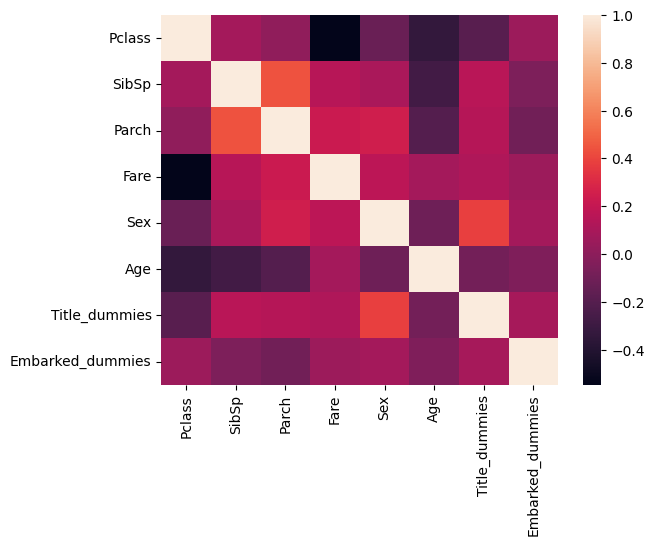

In [81]:
#Matrice de correlation
sns.heatmap(X_train.corr())

#### Maintenant que mon modèle est entraîné il peut renvoyer des prédictions:

In [82]:
# prediction 
final_model.predict(X_train.head(1))

array([0.39285714])

In [83]:
y.iloc[0]

0

In [84]:
# Pour la première ligne ma prédiction est juste.

In [85]:
# obtenir un score global (par défaut il s'agit de l'accuracy)
final_model.score(X_validation, y_validation)

0.4416695545371174

## Submission_Test_Data

In [86]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [87]:
# Encode 'Sex' column
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

### Valeurs manquantes `Fare`

In [88]:
test_data['Fare'] = test_data['Fare'].fillna(value=test_data['Fare'].mean())

## Valeurs manquantes `Age`

In [89]:
display(HTML(test_data['Age'].to_frame().to_html()))

,Age
0,34.50
1,47.00
2,62.00
3,27.00
4,22.00
5,14.00
6,30.00
7,26.00
8,18.00
9,21.00


In [90]:
# Apply the function to create a 'Title' column
test_data['Title'] = test_data['Name'].apply(extract_title)

display(HTML(train_data['Title'].to_frame().to_html()))

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [91]:
test_data['Title'].isnull().sum()

0

In [92]:
# Count occurrences of each title within the train dataset
title_counts_test = test_data['Title'].value_counts()

print(title_counts_test)

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [93]:
selected_titles_test = ['Mr', 'Miss', 'Mrs', 'Master', 'Ms']
filtered_df_test = test_data[test_data['Title'].isin(selected_titles_test)]

# Calculate median age for each title
median_ages_test = filtered_df_test.groupby('Title')['Age'].median()

median_ages_test

Title
Master     7.0
Miss      22.0
Mr        28.5
Mrs       36.5
Ms         NaN
Name: Age, dtype: float64

In [94]:
# Filter rows where 'Age' is NaN
nan_age_rows_test = test_data[test_data['Age'].isna()]
display(HTML(nan_age_rows_test[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
10,NaN,"Ilieff, Mr. Ylio",Mr
22,NaN,"Flegenheim, Mrs. Alfred (Antoinette)",Mrs
29,NaN,"Samaan, Mr. Elias",Mr
33,NaN,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",Mrs
36,NaN,"Roth, Miss. Sarah A",Miss
39,NaN,"Hee, Mr. Ling",Mr
41,NaN,"Franklin, Mr. Thomas Parham",Mr
47,NaN,"Shaughnessy, Mr. Patrick",Mr
54,NaN,"Mangiavacchi, Mr. Serafino Emilio",Mr
58,NaN,"Davison, Mr. Thomas Henry",Mr


In [95]:
# Count occurrences of each title
title_counts_nan_age_rows_test = nan_age_rows_test['Title'].value_counts()

print(title_counts_nan_age_rows_test)

Title
Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: count, dtype: int64


In [96]:
# Replace NaN values in nan_age_rows_test['Age'] with median values based on Title
for index, row in nan_age_rows_test.iterrows():
    title_test = row['Title']
    median_age_test = median_ages_test[title_test]
    nan_age_rows_test.loc[index, 'Age'] = median_age_test
    test_data.loc[index, 'Age'] = median_age_test

In [97]:
display(HTML(nan_age_rows_test[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
10,28.5,"Ilieff, Mr. Ylio",Mr
22,36.5,"Flegenheim, Mrs. Alfred (Antoinette)",Mrs
29,28.5,"Samaan, Mr. Elias",Mr
33,36.5,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",Mrs
36,22.0,"Roth, Miss. Sarah A",Miss
39,28.5,"Hee, Mr. Ling",Mr
41,28.5,"Franklin, Mr. Thomas Parham",Mr
47,28.5,"Shaughnessy, Mr. Patrick",Mr
54,28.5,"Mangiavacchi, Mr. Serafino Emilio",Mr
58,28.5,"Davison, Mr. Thomas Henry",Mr


In [98]:
test_data['Age'].isnull().sum()

1

In [99]:
# For the last missing value we are gona use the mean of the Àge column
test_data['Age'] = test_data['Age'].fillna(value=test_data['Age'].mean())

In [100]:
test_data['Age'].isnull().sum()

0

In [101]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

# Encodage du test_data

### Encodage de la colonne Title

In [102]:
codes, uniques = pd.factorize(test_data['Title'])

test_data['Title_dummies'] = codes

test_data[['Title', 'Title_dummies']]

,Title,Title_dummies
0,Mr,0
1,Mrs,1
2,Mr,0
3,Mr,0
4,Mrs,1
...,...,...
413,Mr,0
414,Dona,8
415,Mr,0
416,Mr,0


In [103]:
test_data.iloc[414]

PassengerId                              1306
Pclass                                      1
Name             Oliva y Ocana, Dona. Fermina
Sex                                         1
Age                                      39.0
SibSp                                       0
Parch                                       0
Ticket                               PC 17758
Fare                                    108.9
Cabin                                    C105
Embarked                                    C
Title                                    Dona
Title_dummies                               8
Name: 414, dtype: object

### Encodage de la colonne Embarked

In [104]:
codes, uniques = pd.factorize(test_data['Embarked'])

test_data['Embarked_dummies'] = codes

test_data[['Embarked', 'Embarked_dummies']]

,Embarked,Embarked_dummies
0,Q,0
1,S,1
2,Q,0
3,S,1
4,S,1
...,...,...
413,S,1
414,C,2
415,S,1
416,S,1


### Création de la colonne Side et Pont_de_Cabin

In [105]:
test_data['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [106]:
# Apply the function to create the 'Side' column
#test_data['Side'] = test_data['Cabin'].apply(determine_side)

#test_data['Side'].shape

In [107]:
# Create a new column 'Pont_de_Cabin' with the first letter of each 'Cabin' value
test_data['Pont_de_Cabin'] = test_data['Cabin'].str[0]

In [108]:
# Filter rows where 'Pclass' is equal to 3
pclass_3_rows = test_data[test_data['Pclass'] == 3]

# Generate random choices for 'E', 'F', or 'G'
random_choices_class_3 = np.random.choice(['E', 'F', 'G'], size=len(pclass_3_rows))

# Assign these random choices to 'Pont_de_Cabin' for Pclass 3
test_data.loc[test_data['Pclass'] == 3, 'Pont_de_Cabin'] = random_choices_class_3

In [109]:
codes, uniques = pd.factorize(test_data['Pont_de_Cabin'])
test_data['Pont_de_Cabin_dummies'] = codes
test_data[['Pont_de_Cabin', 'Pont_de_Cabin_dummies']]

,Pont_de_Cabin,Pont_de_Cabin_dummies
0,F,0
1,G,1
2,NaN,-1
3,F,0
4,G,1
...,...,...
413,G,1
414,C,5
415,G,1
416,F,0


In [110]:
submission_test_data = test_data[['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Age', 'Title_dummies', 'Embarked_dummies']]

In [111]:
submission_test_data.head()

,Pclass,SibSp,Parch,Fare,Sex,Age,Title_dummies,Embarked_dummies
0,3,0,0,7.8292,0,34.5,0,0
1,3,1,0,7.0000,1,47.0,1,1
2,2,0,0,9.6875,0,62.0,0,0
3,3,0,0,8.6625,0,27.0,0,1
4,3,1,1,12.2875,1,22.0,1,1


In [112]:
submission_test_data.isnull().sum()

Pclass              0
SibSp               0
Parch               0
Fare                0
Sex                 0
Age                 0
Title_dummies       0
Embarked_dummies    0
dtype: int64

In [113]:
predictions = final_model.predict(submission_test_data)

In [114]:
# Prepare submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

In [115]:
submission.head()

,PassengerId,Survived
0,892,0.000000
1,893,0.645161
2,894,0.060000
3,895,0.181818
4,896,0.645161


In [116]:
submission.shape

(418, 2)

In [117]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [118]:
# Save the submission to a CSV file
#submission.to_csv('submissionV15.csv', index=False)

In [119]:
# Let's Try Random Forest Model

In [120]:
women = train_data.loc[train_data.Sex == 1]["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [121]:
men = train_data.loc[train_data.Sex == 0]["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [122]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_dummies,Embarked_dummies,Pont_de_Cabin,Pont_de_Cabin_dummies
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,0,F,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,1,G,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,0,NaN,-1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr,0,1,F,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1,1,G,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,28.5,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,1,G,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,Dona,8,2,C,5
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,1,G,1
416,1308,3,"Ware, Mr. Frederick",0,28.5,0,0,359309,8.0500,NaN,S,Mr,0,1,F,0


In [123]:
from sklearn.ensemble import RandomForestClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [126]:
y = train_data['Survived']
#y_test = test_data['Survived']

features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Age', 'Title_dummies', 'Embarked_dummies']
X = train_data[features]
X_test = test_data[features]

In [127]:
model = RandomForestClassifier()

# Define the parameter grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    estimator=model,
    param_grid=param_grid,
    factor=2,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42
)

# Fit HalvingGridSearchCV
halving_search.fit(X, y)

# Get the best parameters and score
print("Best parameters found: ", halving_search.best_params_)
print("Best cross-validated score: ", halving_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 55
max_resources_: 891
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 27
n_resources: 55
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 14
n_resources: 110
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 2
n_candidates: 7
n_resources: 220
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 4
n_resources: 440
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 880
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validated score:  -0.16779870129870128


In [131]:
from sklearn.metrics import mean_squared_error

# Define the best parameters
best_params = {
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 5
}

# Initialize and fit the model
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train, y_train)

predictions = final_model.predict(submission_test_data)

In [132]:
final_model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [130]:
#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submissionV18.csv', index=False)
#print("Your submission was successfully saved!")

Your submission was successfully saved!


In [136]:
import scipy
from scipy import stats, optimize, integrate
from sklearn.model_selection import RandomizedSearchCV

In [139]:
model = RandomForestClassifier()

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "max_depth": scipy.stats.randint(1, 20),          # Random integers between 1 and 20
    "min_samples_split": scipy.stats.randint(2, 20),  # Random integers between 2 and 20
    "min_samples_leaf": scipy.stats.randint(1, 20),   # Random integers between 1 and 20
    "criterion": ['entropy', 'gini', 'log_loss'],      # Discrete values for the criterion
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validated score (MSE): ", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'log_loss', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 19}
Best cross-validated score (MSE):  0.1686004136708362


In [140]:
from sklearn.metrics import mean_squared_error

# Define the best parameters
best_params = {
    'max_depth': 10,
    'min_samples_leaf': 3,
    'min_samples_split': 19,
    'criterion': 'log_loss'
}

# Initialize and fit the model
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train, y_train)

predictions = final_model.predict(submission_test_data)

final_model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [141]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submissionV18.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
